Gates' full, raw (unedited) code
Reference: Professor Ami Gates, Dept. Applied Math, Data Science, University of Colorado

[Dr. Gates' Website](https://gatesboltonanalytics.com/?page_id=892)

---

This code uses a simple record dataset with numeric data.

- The dataset has 3 columns of data (3 features)
- The dataset has labels of 0 and 1.

There is a link to the data below. 

This code uses Keras to build a simple NN to predict the label (called "Decision") for this dataset. 


In [1]:
# libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd

# Data

## Link to dataset
<https://drive.google.com/file/d/1JjkJ4q0MMGJP8jht2ZI9qDEvV5Jjfu0r/view?usp=drive_link>


In [2]:
## Path to dataset on my computer
## YOU will update this path for YOUR computer
filepath="StudentSummerProgramData_Numeric_2NumLabeled_3Cols.csv"
DF=pd.read_csv(filepath)
print(DF.head())

   Decision   GPA  WorkExp  TestScore
0         0  3.90      6.7        962
1         0  3.80      1.4        969
2         0  3.80      2.3        970
3         0  3.60      0.9        969
4         0  3.92      1.2        969


## Prepare the data

This means you need to:

- Normalize the data - but NOT the label!
- Separate the data into a Training set and a Testing set
- Remove and retain the labels for both the Training and Testing datasets.
    
### Step 1 - Use min-max to normalize the data (but NOT the label!)

What are the column names? What column is the label?

In [3]:
print(DF.columns)

Index(['Decision', 'GPA', 'WorkExp', 'TestScore'], dtype='object')


"Decision" is the label of this dataset.

In [4]:
for col in DF.columns:
    #print(col)
    if col != "Decision":
        DF[col]=(DF[col]-DF[col].min())/(DF[col].max()-DF[col].min())
        #print(DF[col])

print(DF.head())

   Decision       GPA   WorkExp  TestScore
0         0  0.981132  0.728261   0.963470
1         0  0.918239  0.152174   0.995434
2         0  0.918239  0.250000   1.000000
3         0  0.792453  0.097826   0.995434
4         0  0.993711  0.130435   0.995434


### Split DF into Training and Testing sets

In [5]:
# Random sampling *without replacement*
TrainDF, TestDF = train_test_split(DF, test_size=0.3)
print(TrainDF.shape)
print(TestDF.shape)
print(TestDF)

(44, 4)
(19, 4)
    Decision       GPA   WorkExp  TestScore
47         1  0.415094  0.130435   0.077626
35         1  0.767296  0.402174   0.675799
52         1  0.402516  0.076087   0.054795
6          0  0.968553  0.163043   0.986301
7          0  0.855346  0.130435   0.995434
37         1  0.861635  0.076087   0.173516
26         0  0.981132  0.000000   0.986301
50         1  0.754717  0.119565   0.073059
56         1  0.616352  0.184783   0.077626
14         0  0.855346  0.402174   0.995434
8          0  0.981132  0.510870   0.958904
27         0  0.761006  0.000000   0.963470
42         1  0.295597  1.000000   0.059361
29         0  0.830189  0.097826   0.936073
57         1  0.421384  0.152174   0.082192
62         1  0.547170  0.184783   0.068493
41         1  0.943396  0.293478   0.662100
59         1  0.358491  0.673913   0.009132
45         1  0.622642  0.173913   0.068493


### Drop and SAVE the labels from the TrainDF and TestDF

In [6]:
TrainLabels=TrainDF["Decision"]
print(TrainLabels.head())
TestLabels=TestDF["Decision"]
print(TestLabels.head())

30    0
18    0
25    0
0     0
13    0
Name: Decision, dtype: int64
47    1
35    1
52    1
6     0
7     0
Name: Decision, dtype: int64


In [7]:
TrainDF = TrainDF.drop(columns="Decision", axis=1)
print(TrainDF.head())
print(TrainDF.shape)

         GPA   WorkExp  TestScore
30  0.905660  0.130435   0.990868
18  0.729560  0.076087   0.977169
25  0.830189  0.239130   0.986301
0   0.981132  0.728261   0.963470
13  0.849057  0.347826   0.986301
(44, 3)


In [8]:
TestDF = TestDF.drop(columns="Decision", axis=1)
print(TestDF.head())

         GPA   WorkExp  TestScore
47  0.415094  0.130435   0.077626
35  0.767296  0.402174   0.675799
52  0.402516  0.076087   0.054795
6   0.968553  0.163043   0.986301
7   0.855346  0.130435   0.995434


# Using Keras

## Step 1: Create a TF - Keras NN Model

<https://keras.io/guides/sequential_model/>


In [9]:
My_NN_Model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, input_shape=(3,), activation='relu'), ## Our data is flat and 3D
  # (*) See note below
  
  ## second hidden layer -  with 2 units 
  tf.keras.layers.Dense(2, activation='relu'),   # (**) referenced link below
  ## The first value, 2 here, are the units in the hidden layer. 
  ## (***) referenced link below
  
  ##tf.keras.layers.Dropout(0.2),                ## We do not need this here. 
  tf.keras.layers.Dense(1, activation='sigmoid') ## for 0 or 1
])

(\*) **Note:** Here, we are sending our data to a hidden layer that has 4 hidden units.

- `Dense` implements the operation: `output = activation(dot(input, kernel) + bias)`
    - The "`kernel`" are the weights matrix.
- In Keras, the input layer itself is not a layer, but a tensor. 
    - It's the starting tensor you send to the first hidden layer. 
    - This tensor must have the same shape as your training data

Other relevant links referenced in the above code:
- `tf.keras.layers.Dense` 
    - (\*\*) <https://keras.io/api/layers/core_layers/dense/>
    - (\*\*\*) <https://www.tutorialspoint.com/keras/keras_dense_layer.htm>


In [10]:
My_NN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [11]:
## Print the weights
first_layer_weights = My_NN_Model.layers[0].get_weights()[0]
#first_layer_biases  = My_NN_Model.layers[0].get_weights()[1]
second_layer_weights = My_NN_Model.layers[1].get_weights()[0]
third_layer_weights = My_NN_Model.layers[2].get_weights()[0]

print("The first layer weights are: \n", first_layer_weights)
print("The first layer weights shape is\n",first_layer_weights.shape )
print("The second layer weights are: \n", second_layer_weights)
print("The third layer weights are: \n", third_layer_weights)

The first layer weights are: 
 [[-0.5025393  -0.05162388  0.8350564   0.5958649 ]
 [-0.7560888   0.07614303  0.78565943 -0.0158782 ]
 [ 0.14354777 -0.4847178  -0.13484716 -0.35753334]]
The first layer weights shape is
 (3, 4)
The second layer weights are: 
 [[ 0.60221076  0.8026402 ]
 [-0.5638485   0.41089344]
 [ 0.49096894 -0.429451  ]
 [ 0.1907084  -0.6241598 ]]
The third layer weights are: 
 [[-1.2455409]
 [-1.3225081]]


## Compile the Model

In [12]:
loss_function = keras.losses.BinaryCrossentropy(from_logits=False)
My_NN_Model.compile(
                 loss=loss_function,
                 metrics=["accuracy"],
                 optimizer='adam'
                 )

## Fit the Model 

Fit the model to the data (train the model).

(Making the epochs larger can improve the model and prediction accuracy)

In [13]:
Hist=My_NN_Model.fit(TrainDF,TrainLabels, epochs=300,  validation_data=(TestDF, TestLabels))
## batch_size=   is also an option here for batch training

Epoch 1/300


2/2 [==============================] - 1s 458ms/step - loss: 0.6407 - accuracy: 0.6364 - val_loss: 0.7859 - val_accuracy: 0.3684
Epoch 2/300
2/2 [==============================] - 0s 48ms/step - loss: 0.6400 - accuracy: 0.6364 - val_loss: 0.7859 - val_accuracy: 0.3684
Epoch 3/300
2/2 [==============================] - 0s 48ms/step - loss: 0.6395 - accuracy: 0.6364 - val_loss: 0.7863 - val_accuracy: 0.3684
Epoch 4/300
2/2 [==============================] - 0s 45ms/step - loss: 0.6388 - accuracy: 0.6364 - val_loss: 0.7867 - val_accuracy: 0.3684
Epoch 5/300
2/2 [==============================] - 0s 44ms/step - loss: 0.6383 - accuracy: 0.6364 - val_loss: 0.7873 - val_accuracy: 0.3684
Epoch 6/300
2/2 [==============================] - 0s 49ms/step - loss: 0.6376 - accuracy: 0.6364 - val_loss: 0.7878 - val_accuracy: 0.3684
Epoch 7/300
2/2 [==============================] - 0s 45ms/step - loss: 0.6370 - accuracy: 0.6364 - val_loss: 0.7885 - val_accuracy: 0.3684
Epoch 8/300
2/2 [==============

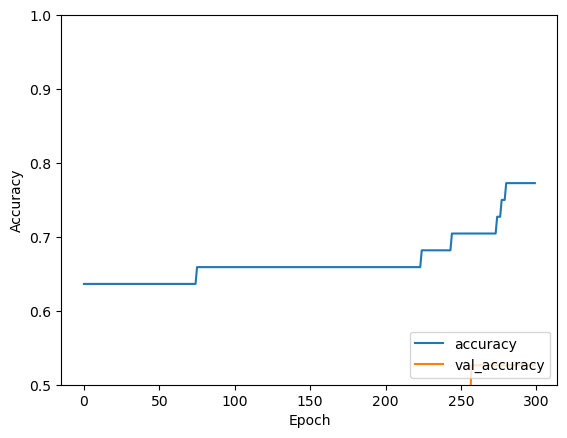

In [14]:
plt.plot(Hist.history['accuracy'], label='accuracy')
plt.plot(Hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Test and Model

In [15]:
Test_Loss, Test_Accuracy = My_NN_Model.evaluate(TestDF, TestLabels)

1/1 [==============================] - 0s 40ms/step - loss: 0.6374 - accuracy: 0.5263


## Save the Model

In [16]:
My_NN_Model.save("Example2_NN_Model")

INFO:tensorflow:Assets written to: Example2_NN_Model\assets


## Predictions

In [17]:
predictions=My_NN_Model.predict(TestDF)

print(predictions)
print(type(predictions))

1/1 [==============================] - 0s 127ms/step
[[0.55399185]
 [0.24952714]
 [0.5670001 ]
 [0.1765249 ]
 [0.21249458]
 [0.3415211 ]
 [0.19097081]
 [0.39869913]
 [0.4496788 ]
 [0.18093817]
 [0.14197691]
 [0.26657587]
 [0.45018274]
 [0.23264357]
 [0.54624206]
 [0.483801  ]
 [0.20716172]
 [0.49750927]
 [0.4504492 ]]
<class 'numpy.ndarray'>


In [18]:
## For predictions >=.5 --> 1 ; else --> 0
predictions[predictions >= .5] = 1
predictions[predictions < .5] = 0
print(predictions)

[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Confusion Matrix

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("The prediction accuracy via confusion matrix is:\n")
print(confusion_matrix(predictions, TestLabels))

The prediction accuracy via confusion matrix is:

[[7 9]
 [0 3]]


### Pretty Confusion Matrix

[[7 9]
 [0 3]]


[Text(0, 0.5, '0:Admit'), Text(0, 1.5, '1:Decline')]

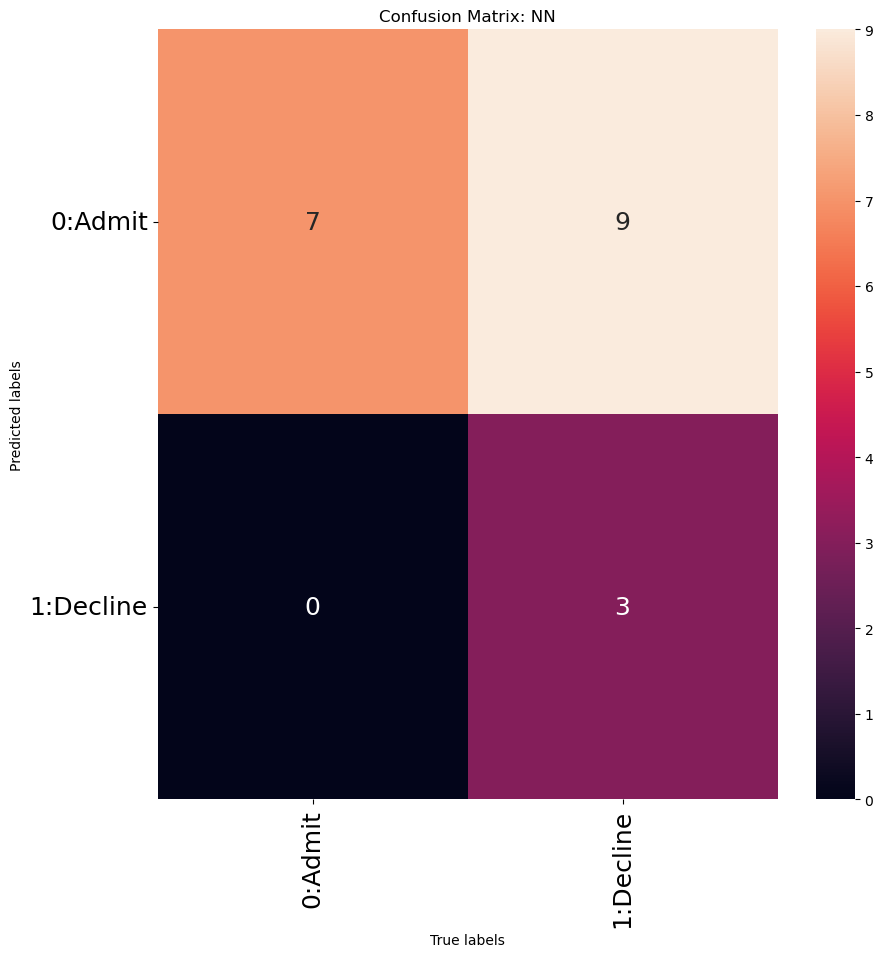

In [20]:
#from sklearn.metrics import confusion_matrix
labels = [0, 1]
cm = confusion_matrix(predictions, TestLabels, labels = labels)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt     

fig, ax = plt.subplots(figsize=(10,10)) 
#ax= plt.subplot()
#sns.set(font_scale=3)
#sns.set (rc = {'figure.figsize':(40, 40)})
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: NN') 
ax.xaxis.set_ticklabels(["0:Admit","1:Decline"],rotation=90, fontsize = 18)
ax.yaxis.set_ticklabels(["0:Admit","1:Decline"],rotation=0, fontsize = 18)